In [13]:
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance
import numpy as np
from scipy.spatial import KDTree
from scipy.io import loadmat
from skimage.io import imsave,imread
#imsave('File_name.jpg',tos)

In [10]:
pip uninstall config

^C
Note: you may need to restart the kernel to use updated packages.


In [40]:
def getPoints(filename):
    x = loadmat(filename)
    return x['annPoints']

def computeSigmas(points):
    nbrs = NearestNeighbors(n_neighbors=2).fit(points)
    res = nbrs.kneighbors(points)
    distances,indexes = res
    #first value is itself
    sigmas = distances[:,1]
    return sigmas

def AdaptativeGaussian(x,y,f,xp,yp):
    tmp1 = (1/np.sqrt(2*np.pi*f))
    tmp2 = np.exp(-( (y-xp)**2 + (x-yp)**2 )/(2*(f**2)))
    return tmp1*tmp2

def computeFk(sigma,k):
    return np.power(sigma,1/k)

def computeDenseMap(sigmas,points,size,N,k):
    fk = computeFk(sigmas,k)
    h,w = size
    DenseMap = np.zeros((h,w))
    if k==-1:
        for i in range(N):
            xpi = points[i,0]
            ypi = points[i,1]
            DenseMap[int(ypi),int(xpi)] = 1.0
        return DenseMap
    else :
        for i in range(N):
            xpi = points[i,0]
            ypi = points[i,1]
            fki = fk[i]
            DenseMap+=np.fromfunction( lambda x,y : AdaptativeGaussian(x,y,fki,xpi,ypi),size )
        DenseMap = (DenseMap/np.sum(DenseMap))*N
        return DenseMap
def image_crop(image,p_size):
    w,h = image.shape
    new_x = int(np.ceil(h/p_size)*p_size)
    print("x padding = "+str(new_x - h))
    return new_x

In [32]:
%load_ext autoreload
%autoreload 2
%aimport UCF50
import UCF50 as ucf
data = ucf.UCF50("UCF_CC_50_IMA", [""], "test")
i,d,dd,ddd = data[0]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


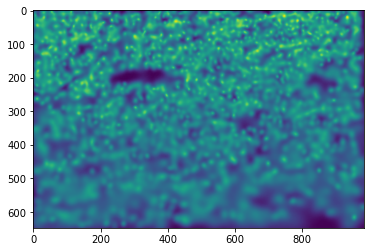

In [33]:
plt.imshow(d)

In [35]:
ddd.sum()

4633.0

In [40]:
((ddd/ddd.sum())*4633).sum()

4633.0

3.5714285714285716
4.0
x padding = 24
672


(648, 984)

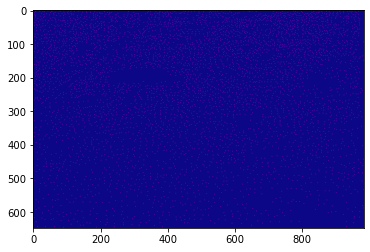

In [41]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(ddd,cmap='plasma')
np.sum(d)
print(image_crop(d,224))
d.shape

In [23]:
test = np.random.random((10,10))
print(np.argmax(test)) 

32


In [61]:
np.unravel_index(32,[10,10])
prob = (d/d.sum()).copy().flatten()

In [62]:
indexes = [i for i in range(d.size)]

In [87]:
indexes = [i for i in range(d.size)]
prob = (d/d.sum()).copy().flatten()
w,h = d.shape
index = np.random.choice(indexes,p=prob)
x,y = np.unravel_index(index,[w,h])
# resamples.shape = (1000, 1000000)


In [113]:
h,w = d.shape

In [138]:
index = np.random.choice(indexes,p=prob)
np.unravel_index(index,[h,w])

(330, 459)

In [50]:
np.sum((d/np.sum(d))*4633)

4633.000000000001

AttributeError: 'JpegImageFile' object has no attribute 'sum'

In [21]:
import matplotlib.pyplot as plt
img, den1, den2 ,deni = data[0]

TypeError: 'Image' object is not subscriptable

In [24]:
img[:,0:52,0:10]

TypeError: 'Image' object is not subscriptable

In [22]:
plt.imshow(img[0:50,0:50])

TypeError: 'Image' object is not subscriptable

In [19]:
data.img_files

['UCF_CC_50_IMA/img//1.jpg',
 'UCF_CC_50_IMA/img//10.jpg',
 'UCF_CC_50_IMA/img//11.jpg',
 'UCF_CC_50_IMA/img//12.jpg',
 'UCF_CC_50_IMA/img//13.jpg',
 'UCF_CC_50_IMA/img//14.jpg',
 'UCF_CC_50_IMA/img//15.jpg',
 'UCF_CC_50_IMA/img//16.jpg',
 'UCF_CC_50_IMA/img//17.jpg',
 'UCF_CC_50_IMA/img//18.jpg',
 'UCF_CC_50_IMA/img//19.jpg',
 'UCF_CC_50_IMA/img//2.jpg',
 'UCF_CC_50_IMA/img//20.jpg',
 'UCF_CC_50_IMA/img//21.jpg',
 'UCF_CC_50_IMA/img//22.jpg',
 'UCF_CC_50_IMA/img//23.jpg',
 'UCF_CC_50_IMA/img//24.jpg',
 'UCF_CC_50_IMA/img//25.jpg',
 'UCF_CC_50_IMA/img//26.jpg',
 'UCF_CC_50_IMA/img//27.jpg',
 'UCF_CC_50_IMA/img//28.jpg',
 'UCF_CC_50_IMA/img//29.jpg',
 'UCF_CC_50_IMA/img//3.jpg',
 'UCF_CC_50_IMA/img//30.jpg',
 'UCF_CC_50_IMA/img//31.jpg',
 'UCF_CC_50_IMA/img//32.jpg',
 'UCF_CC_50_IMA/img//33.jpg',
 'UCF_CC_50_IMA/img//34.jpg',
 'UCF_CC_50_IMA/img//35.jpg',
 'UCF_CC_50_IMA/img//36.jpg',
 'UCF_CC_50_IMA/img//37.jpg',
 'UCF_CC_50_IMA/img//38.jpg',
 'UCF_CC_50_IMA/img//39.jpg',
 'UCF_CC_50_I

In [26]:
data[0]

(<PIL.Image.Image image mode=RGB size=984x648 at 0x262C3C15850>,
 array([[  2.41103261,  25.1202232 ],
        [  7.99013974,  20.64353926],
        [ 14.6850683 ,  25.67980869],
        ...,
        [108.97197886,  19.80416102],
        [363.37926414,  60.09431646],
        [355.01060344,  61.77307294]]))

In [24]:
data.gt_files[0]

'UCF_CC_50_IMA/pts//1_ann.mat'

In [31]:
data.gt_D1_path

'UCF_CC_50_IMA/den1'

In [30]:
data.img_files[0].split("/")

['UCF_CC_50_IMA', 'img', '', '1.jpg']

(648, 984)

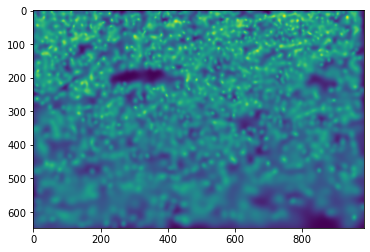

In [75]:
import matplotlib.pyplot as plt
plt.imshow(D1)
gt_count
img.shape


In [77]:
for i in range(len(data)):
    filepath = data.img_files[i]
    filename = filepath.split("/")[-1]
    name = filename.split(".")[0]
    img = imread(filepath)
    points = getPoints(data.gt_files[i])
    gt_count = len(points)
    sigmas = computeSigmas(points)
    print(name+" Go !!")
    D1 = computeDenseMap(sigmas,points,img.shape,gt_count,1)
    D1 = (255*(D1/np.max(D1))).astype(int)

    imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
    print(name+" Okay 1 !!")
    D2 = computeDenseMap(sigmas,points,img.shape,gt_count,2)
    D2 = (255*(D2/np.max(D2))).astype(int)

    imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)  
    print(name+" Okay 2 !!")

1 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/1.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


1 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/1.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


1 Okay 2 !!
10 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/10.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


10 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/10.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


10 Okay 2 !!
11 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/11.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


11 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/11.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


11 Okay 2 !!
12 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/12.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


12 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/12.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


12 Okay 2 !!
13 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/13.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


13 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/13.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


13 Okay 2 !!
14 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/14.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


14 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/14.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


14 Okay 2 !!
15 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/15.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


15 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/15.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


15 Okay 2 !!
16 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/16.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [3, 255]. Convert image to uint8 prior to saving to suppress this warning.


16 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/16.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


16 Okay 2 !!
17 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/17.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


17 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/17.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


17 Okay 2 !!
18 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/18.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


18 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/18.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


18 Okay 2 !!
19 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/19.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


19 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/19.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


19 Okay 2 !!
2 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/2.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


2 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/2.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


2 Okay 2 !!
20 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/20.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [3, 255]. Convert image to uint8 prior to saving to suppress this warning.


20 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/20.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


20 Okay 2 !!
21 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/21.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


21 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/21.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


21 Okay 2 !!
22 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/22.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


22 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/22.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


22 Okay 2 !!
23 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/23.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


23 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/23.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


23 Okay 2 !!
24 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/24.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


24 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/24.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


24 Okay 2 !!
25 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/25.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


25 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/25.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


25 Okay 2 !!
26 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/26.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


26 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/26.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


26 Okay 2 !!
27 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/27.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


27 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/27.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


27 Okay 2 !!
28 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/28.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [6, 255]. Convert image to uint8 prior to saving to suppress this warning.


28 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/28.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


28 Okay 2 !!
29 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/29.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


29 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/29.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


29 Okay 2 !!
3 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/3.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [14, 255]. Convert image to uint8 prior to saving to suppress this warning.


3 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/3.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


3 Okay 2 !!
30 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/30.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


30 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/30.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


30 Okay 2 !!
31 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/31.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


31 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/31.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


31 Okay 2 !!
32 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/32.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [2, 255]. Convert image to uint8 prior to saving to suppress this warning.


32 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/32.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


32 Okay 2 !!
33 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/33.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [4, 255]. Convert image to uint8 prior to saving to suppress this warning.


33 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/33.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


33 Okay 2 !!
34 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/34.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


34 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/34.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


34 Okay 2 !!
35 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/35.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


35 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/35.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


35 Okay 2 !!
36 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/36.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


36 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/36.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


36 Okay 2 !!
37 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/37.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


37 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/37.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


37 Okay 2 !!
38 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/38.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [9, 255]. Convert image to uint8 prior to saving to suppress this warning.


38 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/38.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


38 Okay 2 !!
39 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/39.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [15, 255]. Convert image to uint8 prior to saving to suppress this warning.


39 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/39.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


39 Okay 2 !!
4 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/4.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


4 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/4.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


4 Okay 2 !!
40 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/40.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


40 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/40.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


40 Okay 2 !!
41 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/41.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


41 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/41.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


41 Okay 2 !!
42 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/42.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [2, 255]. Convert image to uint8 prior to saving to suppress this warning.


42 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/42.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


42 Okay 2 !!
43 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/43.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


43 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/43.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


43 Okay 2 !!
44 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/44.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


44 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/44.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


44 Okay 2 !!
45 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/45.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [5, 255]. Convert image to uint8 prior to saving to suppress this warning.


45 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/45.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


45 Okay 2 !!
46 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/46.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [2, 255]. Convert image to uint8 prior to saving to suppress this warning.


46 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/46.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


46 Okay 2 !!
47 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/47.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


47 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/47.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


47 Okay 2 !!
48 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/48.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


48 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/48.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


48 Okay 2 !!
49 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/49.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [2, 255]. Convert image to uint8 prior to saving to suppress this warning.


49 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/49.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


49 Okay 2 !!
5 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/5.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


5 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/5.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


5 Okay 2 !!
50 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/50.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


50 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/50.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


50 Okay 2 !!
6 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/6.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


6 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/6.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


6 Okay 2 !!
7 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/7.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


7 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/7.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


7 Okay 2 !!
8 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/8.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


8 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/8.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


8 Okay 2 !!
9 Go !!


<ipython-input-77-4f0f171bce54>:13: UserWarning: UCF_CC_50_IMA/den1/9.jpg is a low contrast image
  imsave(data.gt_D1_path+"/"+name + '.jpg',D1)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


9 Okay 1 !!


<ipython-input-77-4f0f171bce54>:18: UserWarning: UCF_CC_50_IMA/den2/9.jpg is a low contrast image
  imsave(data.gt_D2_path+"/"+ name + '.jpg',D2)
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


9 Okay 2 !!


In [76]:
    D1 = computeDenseMap(sigmas,points,img.shape,gt_count,1)
    imsave(data.gt_D1_path+name'.jpg',D1)
    D2 = computeDenseMap(sigmas,points,img.shape,gt_count,2)
    imsave(data.gt_D2_path+name'.jpg',D2)  

SyntaxError: invalid syntax (<ipython-input-76-ea94987c0c18>, line 3)

In [42]:
a = imread(data.img_files[-5])
a.shape

(440, 640)

In [43]:
data.gt_files

['UCF_CC_50_IMA/pts//1_ann.mat',
 'UCF_CC_50_IMA/pts//10_ann.mat',
 'UCF_CC_50_IMA/pts//11_ann.mat',
 'UCF_CC_50_IMA/pts//12_ann.mat',
 'UCF_CC_50_IMA/pts//13_ann.mat',
 'UCF_CC_50_IMA/pts//14_ann.mat',
 'UCF_CC_50_IMA/pts//15_ann.mat',
 'UCF_CC_50_IMA/pts//16_ann.mat',
 'UCF_CC_50_IMA/pts//17_ann.mat',
 'UCF_CC_50_IMA/pts//18_ann.mat',
 'UCF_CC_50_IMA/pts//19_ann.mat',
 'UCF_CC_50_IMA/pts//2_ann.mat',
 'UCF_CC_50_IMA/pts//20_ann.mat',
 'UCF_CC_50_IMA/pts//21_ann.mat',
 'UCF_CC_50_IMA/pts//22_ann.mat',
 'UCF_CC_50_IMA/pts//23_ann.mat',
 'UCF_CC_50_IMA/pts//24_ann.mat',
 'UCF_CC_50_IMA/pts//25_ann.mat',
 'UCF_CC_50_IMA/pts//26_ann.mat',
 'UCF_CC_50_IMA/pts//27_ann.mat',
 'UCF_CC_50_IMA/pts//28_ann.mat',
 'UCF_CC_50_IMA/pts//29_ann.mat',
 'UCF_CC_50_IMA/pts//3_ann.mat',
 'UCF_CC_50_IMA/pts//30_ann.mat',
 'UCF_CC_50_IMA/pts//31_ann.mat',
 'UCF_CC_50_IMA/pts//32_ann.mat',
 'UCF_CC_50_IMA/pts//33_ann.mat',
 'UCF_CC_50_IMA/pts//34_ann.mat',
 'UCF_CC_50_IMA/pts//35_ann.mat',
 'UCF_CC_50_IMA/p

In [1]:
np.max(D1)

NameError: name 'np' is not defined

In [2]:
pip install easydict

  Created wheel for easydict: filename=easydict-1.9-py3-none-any.whl size=6354 sha256=593eafd8651658982d83927dd26ac5a5c7a7edb8a25b696796f3421c45d98b3d
  Stored in directory: c:\users\maison\appdata\local\pip\cache\wheels\d3\e0\e9\305e348717e399665119bd012510d51ff4f22d709ff60c3096
Successfully built easydict
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Helper function to show a batch
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, landmarks_batch = \
            sample_batched[0], sample_batched[1]
    batch_size = len(images_batch)
    im_size = images_batch.size(2)
    grid_border_size = 2

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

    plt.title('Batch from dataloader')


In [1]:
%load_ext autoreload
%autoreload 2
%aimport loading_data
import loading_data as ucf
import matplotlib.pyplot as plt
from torchvision import transforms, utils

train_loader, val_loader, restore_transform = ucf.loading_data()

0 torch.Size([4, 3, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224])
1 torch.Size([4, 3, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224])
2 torch.Size([4, 3, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224])
3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 torch.Size([4, 3, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224])


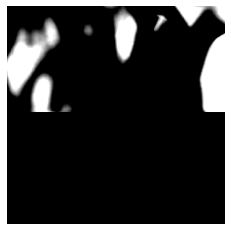

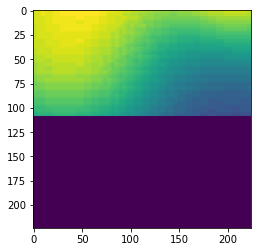

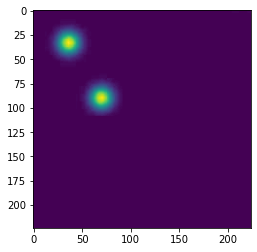

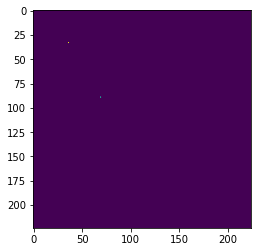

sommes => d1=tensor(2., dtype=torch.float64)d2=tensor(2.0000, dtype=torch.float64)di=tensor(2., dtype=torch.float64)


In [2]:
for i_batch, sample_batched in enumerate(train_loader):
    print(i_batch, 
          sample_batched[0].size(),
          sample_batched[1].size(),
          sample_batched[2].size(),
          sample_batched[3].size())

    # observe 4th batch and stop.
    if i_batch == 3:
        
        image = sample_batched[0][0,:,:,:].permute(1,2,0)
        d1 = sample_batched[1][0,:,:]
        d2 = sample_batched[2][0,:,:]
        di = sample_batched[3][0,:,:]
        plt.figure()
        plt.axis('off')
        plt.ioff()
        plt.imshow(image)
        plt.show()
        plt.imshow(d1)
        plt.show()
        plt.imshow(d2)
        plt.show()
        plt.imshow(di)
        plt.show()
        print("sommes => d1="+str(d1.sum())+"d2="+str(d2.sum())+"di="+str(di.sum()))
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([4, 3, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224])


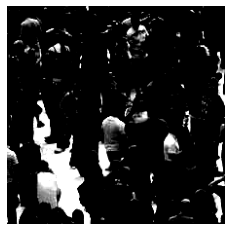

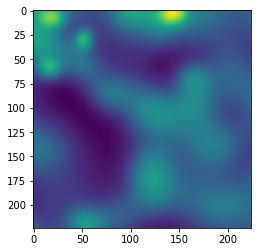

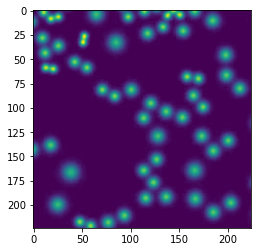

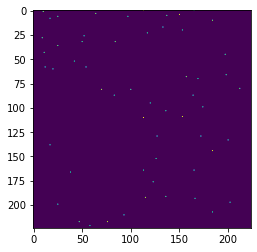

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1 torch.Size([4, 3, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224])


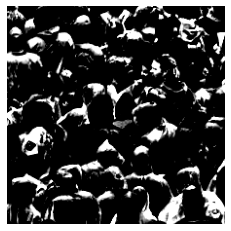

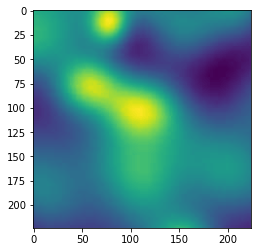

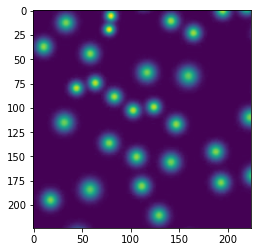

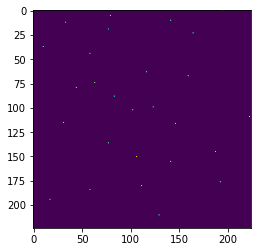

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2 torch.Size([4, 3, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224])


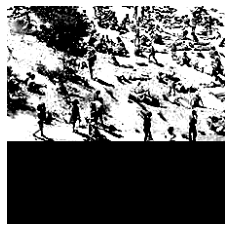

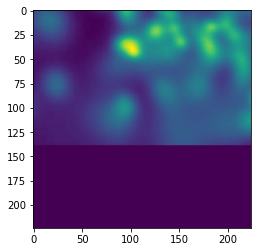

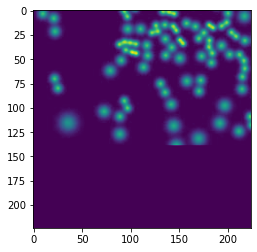

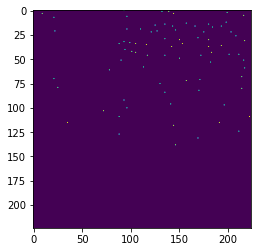

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3 torch.Size([4, 3, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224])


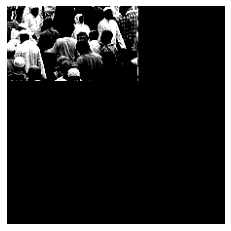

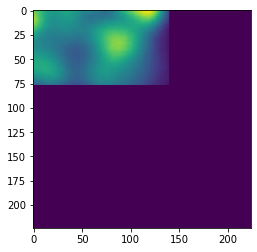

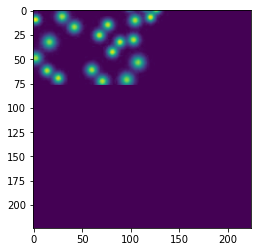

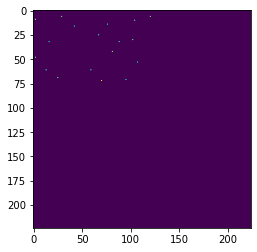

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4 torch.Size([4, 3, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224])


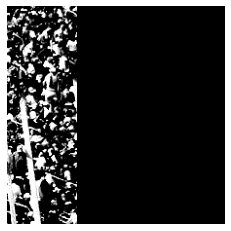

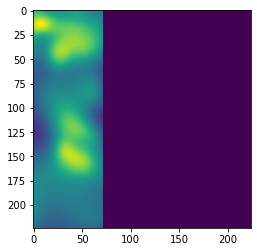

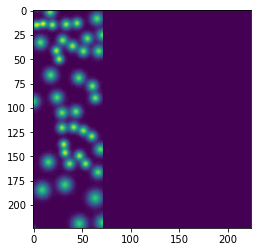

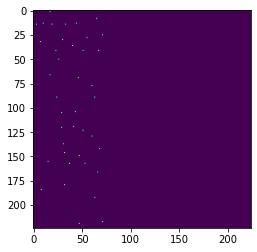

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5 torch.Size([4, 3, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224])


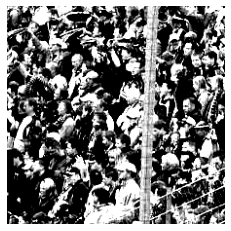

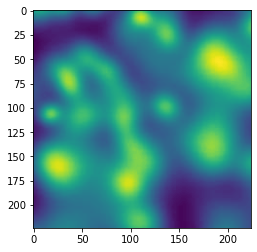

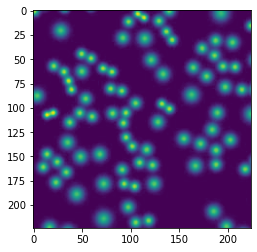

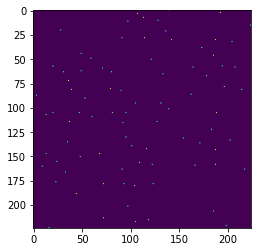

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6 torch.Size([4, 3, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224])


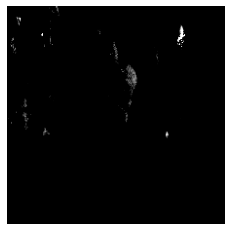

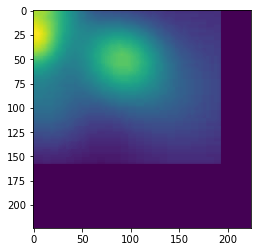

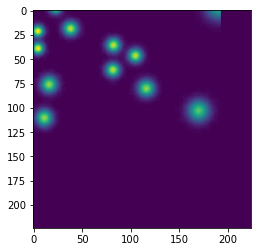

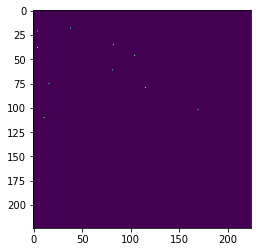

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


7 torch.Size([4, 3, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224])


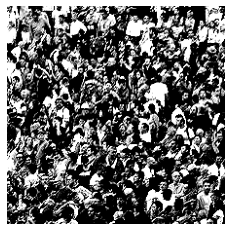

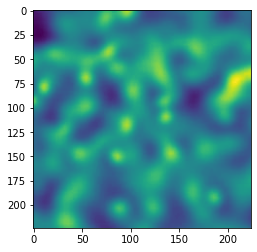

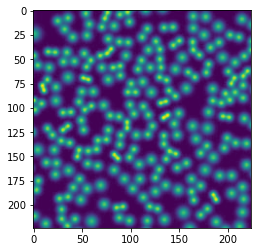

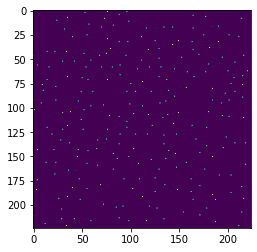

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8 torch.Size([4, 3, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224])


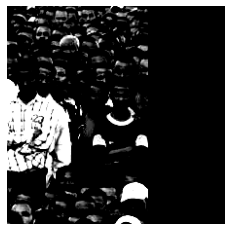

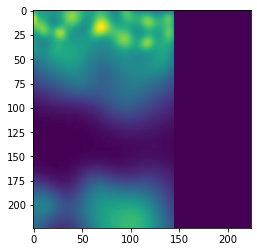

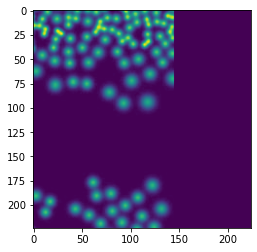

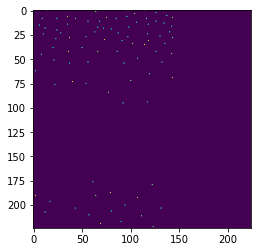

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


9 torch.Size([4, 3, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224])


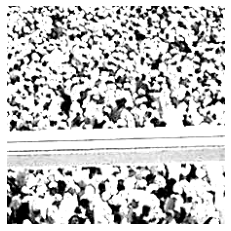

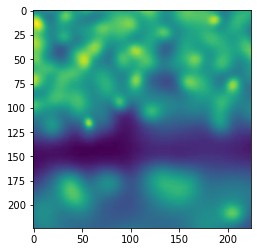

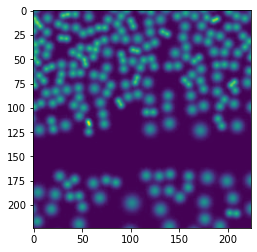

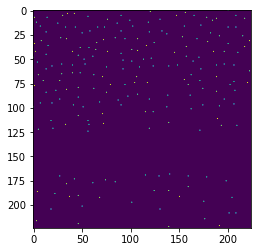

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


10 torch.Size([4, 3, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224]) torch.Size([4, 224, 224])


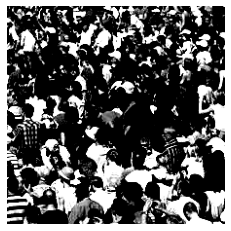

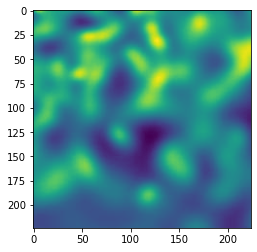

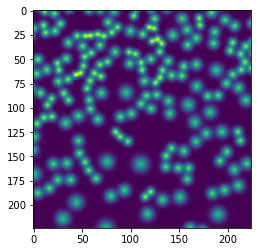

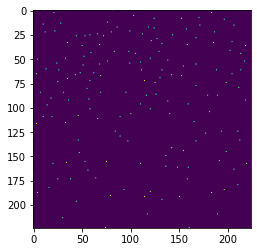

In [7]:
for i_batch, sample_batched in enumerate(train_loader):
    print(i_batch, 
          sample_batched[0].size(),
          sample_batched[1].size(),
          sample_batched[2].size(),
          sample_batched[3].size())

    # observe 4th batch and stop.
        
    image = sample_batched[0][0,:,:,:].permute(1,2,0)
    d1 = sample_batched[1][0,:,:]
    d2 = sample_batched[2][0,:,:]
    di = sample_batched[3][0,:,:]
    plt.figure()
    plt.axis('off')
    plt.ioff()
    plt.imshow(image)
    plt.show()
    plt.imshow(d1)
    plt.show()
    plt.imshow(d2)
    plt.show()
    plt.imshow(di)
    plt.show()
    
    if i_batch == 10:
        break

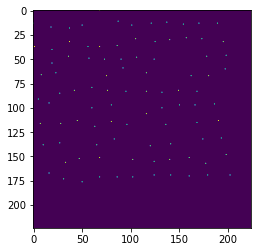

In [9]:
plt.imshow(di)

In [30]:
di.unique()

tensor([  0., 100.], dtype=torch.float64)

In [4]:
import torch
import torch.nn.functional as F

a= torch.randn([3, 744, 1116])
pad_right=1
pad_bot = 1
aa = F.pad(input=a, pad=(0, pad_right, 0, pad_bot), mode='constant', value=0)

In [21]:
a.permute(1,2,0).shape

torch.Size([744, 1116, 3])

In [20]:
a.transpose(0,1).shape

torch.Size([744, 3, 1116])

In [9]:
import torch.nn.functional as F
source = torch.rand((3,1,1))
result = F.pad(input=source, pad=(0, 1, 0, 1), mode='constant', value=0)

In [13]:
source = torch.rand((5,2,1))
torch.nn.functional.pad(input=source, pad=(0, 1, 0, 1), mode='constant', value=0)

tensor([[[0.7170, 0.0000],
         [0.6431, 0.0000],
         [0.0000, 0.0000]],

        [[0.4837, 0.0000],
         [0.5196, 0.0000],
         [0.0000, 0.0000]],

        [[0.3144, 0.0000],
         [0.8745, 0.0000],
         [0.0000, 0.0000]],

        [[0.3500, 0.0000],
         [0.9016, 0.0000],
         [0.0000, 0.0000]],

        [[0.1809, 0.0000],
         [0.1817, 0.0000],
         [0.0000, 0.0000]]])

In [7]:
source.shape

torch.Size([3, 1, 1])

In [23]:
pip install cudamat

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cudamat (from versions: none)
ERROR: No matching distribution found for cudamat


In [22]:

import gnumpy as g

gnumpy: failed to import cudamat. Using npmat instead. No GPU will be used.


ModuleNotFoundError: No module named 'npmat'

In [11]:
source = torch.rand((3,118,118))
source2 = torch.rand((3,224,224))
test = []
test.append(source)
test.append(source2)

In [15]:
torch.stack(test, 3, out=source)

RuntimeError: stack expects each tensor to be equal size, but got [3, 118, 118] at entry 0 and [3, 224, 224] at entry 1

In [16]:
len(test)

2

In [19]:
torch.stack(test,dim=0)

RuntimeError: stack expects each tensor to be equal size, but got [3, 118, 118] at entry 0 and [3, 224, 224] at entry 1